![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
import seaborn as sns
# Configuración de estilo
sns.set()

In [118]:
from sklearn.preprocessing import OneHotEncoder

# Importación de los datos

In [170]:
# Importamos el excel como un DataFrame
Hospital = pd.read_excel(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\HospitalOk.xlsx')


In [ ]:
# Observamos que solamente tres columnas son de tipo numérico. Está bien, esas son EDAD, PSA y MUESTRAS TOMADAS.
# También están los días de hospitalización pero las desestimamos porque serán eliminadas
Hospital.info()

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [172]:
# Eliminamos las columnas DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC, ya que no nos interesa la cantidad de días
# de hospitalización, solamente saber si requirió o no hospitalización

Hospital.drop(columns=['DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACION UPC'], inplace=True)

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [173]:
columnas_numericas = ['EDAD', 'PSA', 'MUESTRAS TOMADAS']

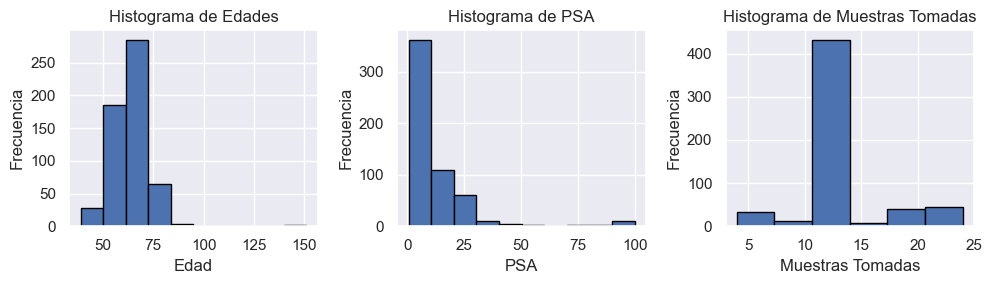

In [174]:
# Realizamos un histograma para las variables numéricas
plt.figure(figsize=(10, 3))  # Tamaño de la figura

# Histograma de la columna EDAD
plt.subplot(1, 3, 1)  # 1 filas, 3 columnas, primer gráfico
plt.hist(Hospital['EDAD'], bins=10, edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma de la columna PSA
plt.subplot(1, 3, 2)  # 1 filas, 3 columnas, segundo gráfico
plt.hist(Hospital['PSA'], bins=10, edgecolor='black')
plt.title('Histograma de PSA')
plt.xlabel('PSA')
plt.ylabel('Frecuencia')

# Histograma de la columna MUESTRAS TOMADAS
plt.subplot(1, 3, 3)  # 1 filas, 3 columnas, tercer gráfico
plt.hist(Hospital['MUESTRAS TOMADAS'], bins=6, edgecolor='black')
plt.title('Histograma de Muestras Tomadas')
plt.xlabel('Muestras Tomadas')
plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajustamos el espaciado entre subgráficos

In [175]:
# Asignamos mediana de EDAD a los dos valores erróneos encontrados
Hospital.loc[Hospital['EDAD'] > 105, 'EDAD'] = Hospital['EDAD'].median()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [ ]:
# Las edades encontradas eran valores superiores a 140 años, por lo que se sabe que es un error.
# En este caso se optó por asignar el valor de la mediana a los dos valores erróneos. 
# No hay otros valores para imputar y/o eliminar

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

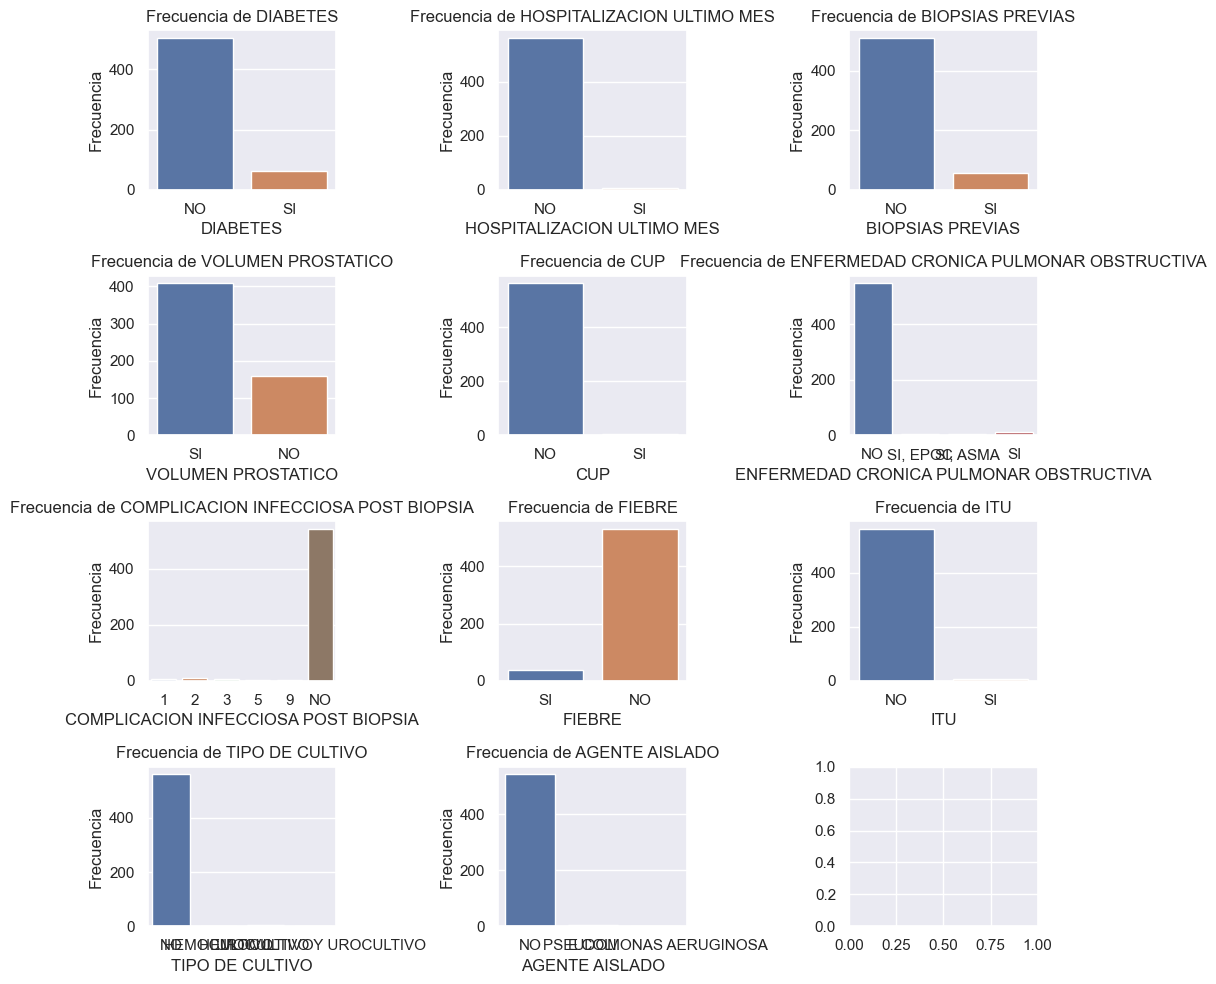

In [176]:
# subplots para cada variable categórica
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))  # número de filas según columnas categóricas

# Gráfico de barras para cada variable categórica
sns.countplot(data=Hospital, x='DIABETES', ax=axes[0,0])
axes[0,0].set_title('Frecuencia de DIABETES')
axes[0,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='HOSPITALIZACION ULTIMO MES', ax=axes[0,1])
axes[0,1].set_title('Frecuencia de HOSPITALIZACION ULTIMO MES')
axes[0,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='BIOPSIAS PREVIAS', ax=axes[0,2])
axes[0,2].set_title('Frecuencia de BIOPSIAS PREVIAS')
axes[0,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='VOLUMEN PROSTATICO', ax=axes[1,0])
axes[1,0].set_title('Frecuencia de VOLUMEN PROSTATICO')
axes[1,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='CUP', ax=axes[1,1])
axes[1,1].set_title('Frecuencia de CUP')
axes[1,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', ax=axes[1,2])
axes[1,2].set_title('Frecuencia de ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA')
axes[1,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='COMPLICACION INFECCIOSA POST BIOPSIA', ax=axes[2,0])
axes[2,0].set_title('Frecuencia de COMPLICACION INFECCIOSA POST BIOPSIA')
axes[2,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='FIEBRE', ax=axes[2,1])
axes[2,1].set_title('Frecuencia de FIEBRE')
axes[2,1].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='ITU', ax=axes[2,2])
axes[2,2].set_title('Frecuencia de ITU')
axes[2,2].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='TIPO DE CULTIVO', ax=axes[3,0])
axes[3,0].set_title('Frecuencia de TIPO DE CULTIVO')
axes[3,0].set_ylabel('Frecuencia')

sns.countplot(data=Hospital, x='AGENTE AISLADO', ax=axes[3,1])
axes[3,1].set_title('Frecuencia de AGENTE AISLADO')
axes[3,1].set_ylabel('Frecuencia')

# diseño de los subplots
plt.tight_layout()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_2852\3466615518.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


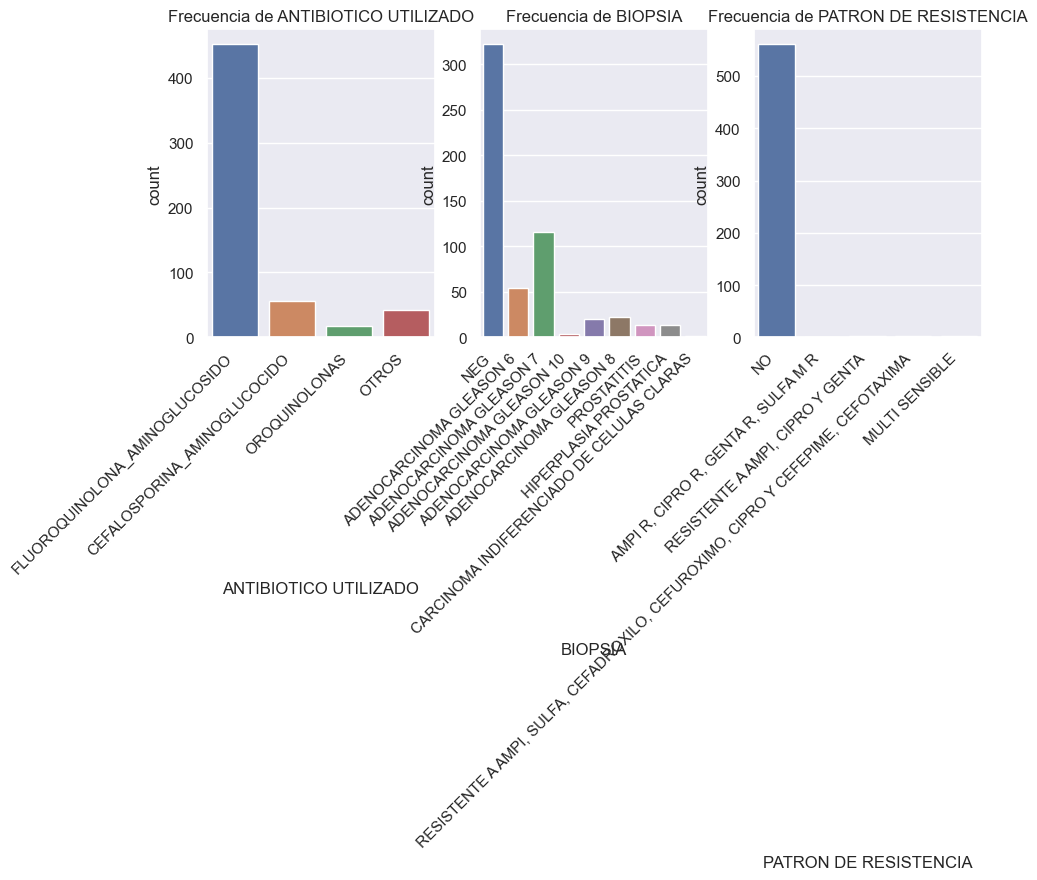

In [177]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

sns.countplot(data=Hospital, x='ANTIBIOTICO UTILIZADO', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
axes[0].set_title('Frecuencia de ANTIBIOTICO UTILIZADO')

sns.countplot(data=Hospital, x='BIOPSIA', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_title('Frecuencia de BIOPSIA')

sns.countplot(data=Hospital, x='PATRON DE RESISTENCIA', ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')
axes[2].set_title('Frecuencia de PATRON DE RESISTENCIA')

plt.tight_layout()

En HospitalOk, realizamos el reagrupamiento de las columnas categóricas que consideramos
fuertemente binarias, en SI/NO (y conservamos nan)

In [213]:
# Creamos copia para modificar y tener un respaldo original de comparación
HospitalOk = Hospital.copy()

In [214]:
# Reagrupamos valores de 'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA' en SI/NO, conservando los nan
HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, EPOC', 'SI', inplace=True)
HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].replace('SI, ASMA', 'SI', inplace=True)

# Verificamos que esté bien dividida en SI/NO y conserve los nan
print(HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].unique())
print(HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].value_counts())
print(HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].count())
print(HospitalOk['ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA'].describe())

['NO' 'SI' nan]
ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA
NO    546
SI     20
Name: count, dtype: int64
566
count     566
unique      2
top        NO
freq      546
Name: ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA, dtype: object


In [215]:
# Reagrupamos valores de 'COMPLICACION INFECCIOSA POST BIOPSIA' en SI/NO, conservando los nan si hubiera
HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'] = np.where(
    (HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'] == 'NO'),
    'NO', np.where(pd.isnull(HospitalOk['BIOPSIA']), np.nan, 'SI'))

# Verificamos que esté bien dividida en SI/NO (no existían nan)
print(HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'].unique())
print(HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'].value_counts())
print(HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'].count())
print(HospitalOk['COMPLICACION INFECCIOSA POST BIOPSIA'].describe())

['SI' 'NO']
COMPLICACION INFECCIOSA POST BIOPSIA
NO    542
SI     26
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      542
Name: COMPLICACION INFECCIOSA POST BIOPSIA, dtype: object


En HospitalModelado reagrupamos todas las columnas posibles en SI/NO y conservamos los nan

In [216]:
# Creamos HospitalModelado para tener un DF opcional, en el que reagrupamos en SI/NO
# a todas las variables categóricas de múltiple opción que lo permitan, siguiendo el criterio: todo lo != NO es SI
HospitalModelado = HospitalOk.copy()

In [217]:
HospitalModelado['BIOPSIA'] = np.where((HospitalModelado['BIOPSIA'] == 'NEG'), 'NO', 'SI')
# El valor 'NO' indica ausencia de enfermedad prostática, y el valor 'SI', presencia.
# (El 'SI' abarcaría los diferentes tipos de adenocarcinomas con los niveles de Gleason, la prostatitis,
# la hiperplasia prostática y el carcinoma indiferenciado de células claras, sin diferenciarlos)

print(HospitalModelado['BIOPSIA'].unique())
print(HospitalModelado['BIOPSIA'].value_counts())
print(HospitalModelado['BIOPSIA'].count())
print(HospitalModelado['BIOPSIA'].describe())

['NO' 'SI']
BIOPSIA
NO    322
SI    246
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      322
Name: BIOPSIA, dtype: object


In [218]:
HospitalModelado['TIPO DE CULTIVO'] = np.where((HospitalModelado['TIPO DE CULTIVO'] == 'NO'), 'NO', 'SI')
# El valor 'NO' indica cultivo NO encontrado

print(HospitalModelado['TIPO DE CULTIVO'].unique())
print(HospitalModelado['TIPO DE CULTIVO'].value_counts())
print(HospitalModelado['TIPO DE CULTIVO'].count())
print(HospitalModelado['TIPO DE CULTIVO'].describe())

['NO' 'SI']
TIPO DE CULTIVO
NO    560
SI      8
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      560
Name: TIPO DE CULTIVO, dtype: object


In [219]:
HospitalModelado['AGENTE AISLADO'].replace('E.COLI', 'SI', inplace=True)
HospitalModelado['AGENTE AISLADO'].replace('PSEUDOMONAS AERUGINOSA', 'SI', inplace=True)
#El valor 'NO' indica ausencia de agente aislado

print(HospitalModelado['AGENTE AISLADO'].unique())
print(HospitalModelado['AGENTE AISLADO'].value_counts())
print(HospitalModelado['AGENTE AISLADO'].count())
print(HospitalModelado['AGENTE AISLADO'].describe())

['NO' 'SI' nan]
AGENTE AISLADO
NO    543
SI      8
Name: count, dtype: int64
551
count     551
unique      2
top        NO
freq      543
Name: AGENTE AISLADO, dtype: object


In [220]:
HospitalModelado['PATRON DE RESISTENCIA'] = np.where(HospitalModelado['PATRON DE RESISTENCIA'] == 'NO','NO', 'SI')
#El valor 'NO' indica que no presenta patrón de resistencia

print(HospitalModelado['PATRON DE RESISTENCIA'].unique())
print(HospitalModelado['PATRON DE RESISTENCIA'].value_counts())
print(HospitalModelado['PATRON DE RESISTENCIA'].count())
print(HospitalModelado['PATRON DE RESISTENCIA'].describe())

['NO' 'SI']
PATRON DE RESISTENCIA
NO    561
SI      7
Name: count, dtype: int64
568
count     568
unique      2
top        NO
freq      561
Name: PATRON DE RESISTENCIA, dtype: object


In [221]:
print(HospitalModelado['HOSPITALIZACION'].unique())
print(HospitalModelado['HOSPITALIZACION'].value_counts())
print(HospitalModelado['HOSPITALIZACION'].count())

['SI' 'NO' nan]
HOSPITALIZACION
NO    541
SI     24
Name: count, dtype: int64
565


In [222]:
HospitalModelado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     568 non-null    int64  
 1   DIABETES                                 568 non-null    object 
 2   HOSPITALIZACION ULTIMO MES               568 non-null    object 
 3   PSA                                      564 non-null    float64
 4   BIOPSIAS PREVIAS                         566 non-null    object 
 5   VOLUMEN PROSTATICO                       567 non-null    object 
 6   ANTIBIOTICO UTILIZADO                    568 non-null    object 
 7   MUESTRAS TOMADAS                         568 non-null    int64  
 8   CUP                                      567 non-null    object 
 9   ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 10  BIOPSIA                                  568 non-n

Vamos a ver cómo se comportan ahora las columnas categóricas que quedaron divididas en SI/NO

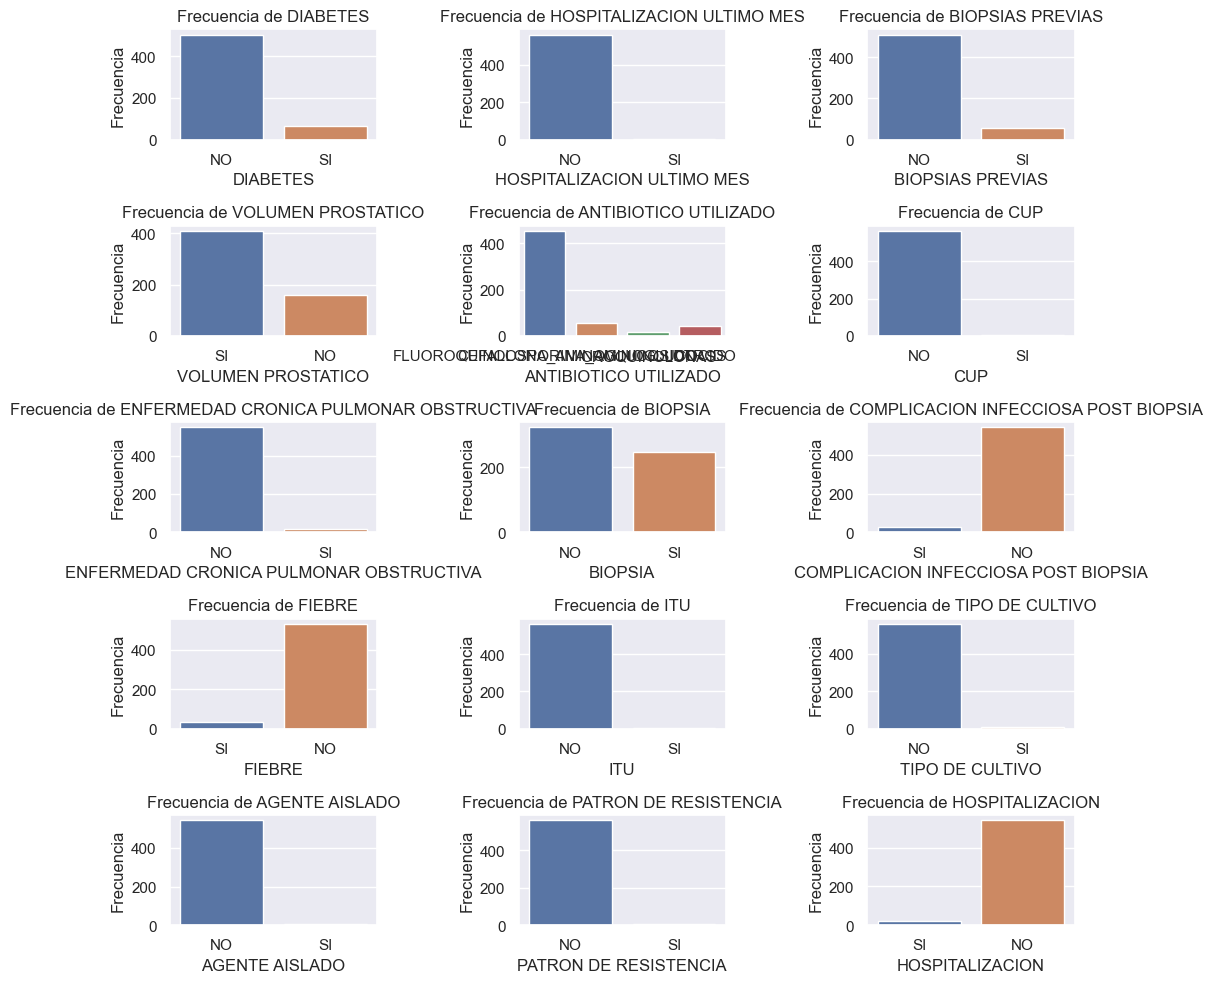

In [211]:
# Configuración de estilo
sns.set()

# subplots para cada variable categórica
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))  # número de filas y columnas, según variables categóricas

# Gráfico de barras para cada variable categórica
for i in range(len(columnas_categoricas)):
    sns.countplot(data=HospitalModelado, x=columnas_categoricas[i], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Frecuencia de {columnas_categoricas[i]}')
    axes[i//3, i%3].set_ylabel('Frecuencia')

# diseño de los subplots
plt.tight_layout()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [ ]:
# No se eliminarán columnas debido a los valores nulos, ya que es una proporción mínima y en el modelado no afecta
# Los valores nulos se transformaron a np.nan en todos los casos

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [ ]:
#No

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [112]:
columnas_categoricas =  [
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'ANTIBIOTICO UTILIZADO', 'CUP',
'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'COMPLICACION INFECCIOSA POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
]

Transformamos los valores de las columnas del DF HospitalOk.

En este DF decidimos dejar como dummies algunas categorías de múltiples valores 

In [228]:
columnas_a_transformarOk = ['DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
                          'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', 'COMPLICACION INFECCIOSA POST BIOPSIA',
                          'FIEBRE', 'ITU', 'HOSPITALIZACION']

for columna in columnas_a_transformarOk:
    HospitalOk[columna].replace('SI', 1, inplace=True)
    HospitalOk[columna].replace('NO', 0, inplace=True)

In [233]:
# Creamos columnas binarias para cada categoría de múltiples valores
BIOPSIA_dummies = pd.get_dummies(HospitalOk['BIOPSIA'], prefix='BIOPSIA')
TIPO_DE_CULTIVO_dummies = pd.get_dummies(HospitalOk['TIPO DE CULTIVO'], prefix='TIPO_DE_CULTIVO')
ANTIBIOTICO_UTILIZADO_dummies = pd.get_dummies(HospitalOk['ANTIBIOTICO UTILIZADO'], prefix='ANTIBIOTICO_UTILIZADO')
AGENTE_AISLADO_dummies = pd.get_dummies(HospitalOk['AGENTE AISLADO'], prefix='AGENTE_AISLADO')
PATRON_DE_RESISTENCIA_dummies = pd.get_dummies(HospitalOk['PATRON DE RESISTENCIA'], prefix='PATRON_DE_RESISTENCIA')

# Concatenamos las columnas binarias al DataFrame original
HospitalOk = pd.concat([HospitalOk, BIOPSIA_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, TIPO_DE_CULTIVO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, ANTIBIOTICO_UTILIZADO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, AGENTE_AISLADO_dummies], axis=1)
HospitalOk = pd.concat([HospitalOk, PATRON_DE_RESISTENCIA_dummies], axis=1)

# Eliminamos las columnas originales
HospitalOk.drop(columns=['BIOPSIA'], inplace=True)
HospitalOk.drop(columns=['TIPO DE CULTIVO'], inplace=True)
HospitalOk.drop(columns=['ANTIBIOTICO UTILIZADO'], inplace=True)
HospitalOk.drop(columns=['AGENTE AISLADO'], inplace=True)
HospitalOk.drop(columns=['PATRON DE RESISTENCIA'], inplace=True)

Transformamos los valores de las columnas del DF HospitalModelado

En este DF transformamos a binarias todas las categorías binarias, y las de múltiples valores
sensibles de ser agrupadas en SI/NO

In [230]:
columnas_a_transformarModelado =  [
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'COMPLICACION INFECCIOSA POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO','PATRON DE RESISTENCIA', 'HOSPITALIZACION',]

for columna in columnas_a_transformarModelado:
    HospitalModelado[columna].replace('SI', 1, inplace=True)
    HospitalModelado[columna].replace('NO', 0, inplace=True)

In [232]:
# Creamos columnas binarias para cada categoría en 'ANTIBIOTICO UTILIZADO'
ANTIBIOTICO_UTILIZADO_dummies = pd.get_dummies(HospitalModelado['ANTIBIOTICO UTILIZADO'], prefix='ANTIBIOTICO_UTILIZADO')
# Concatenamos las columnas binarias al DataFrame original
HospitalModelado = pd.concat([HospitalModelado, ANTIBIOTICO_UTILIZADO_dummies], axis=1)
# Eliminamos la columna original 'ANTIBIOTICO UTILIZADO'
HospitalModelado.drop(columns=['ANTIBIOTICO UTILIZADO'], inplace=True)

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [235]:
columnas_numericas = ['EDAD', 'PSA', 'MUESTRAS TOMADAS']
matriz_correlacion = HospitalModelado[columnas_numericas].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

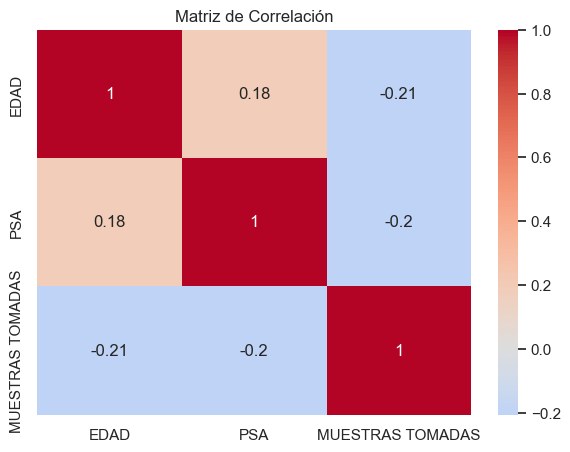

In [238]:
plt.figure(figsize=(7, 5))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Buscamos correlación entre columnas categóricas (pasadas a binario) y numéricas del DF HospitalModelado

In [269]:
columnas_binariasModelado =  [ 'EDAD', 'PSA', 'MUESTRAS TOMADAS',
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'COMPLICACION INFECCIOSA POST BIOPSIA',
'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
]

In [276]:
matriz_correlacion1 = HospitalModelado[columnas_binariasModelado].corr()

Text(0.5, 1.0, 'Matriz de Correlación')

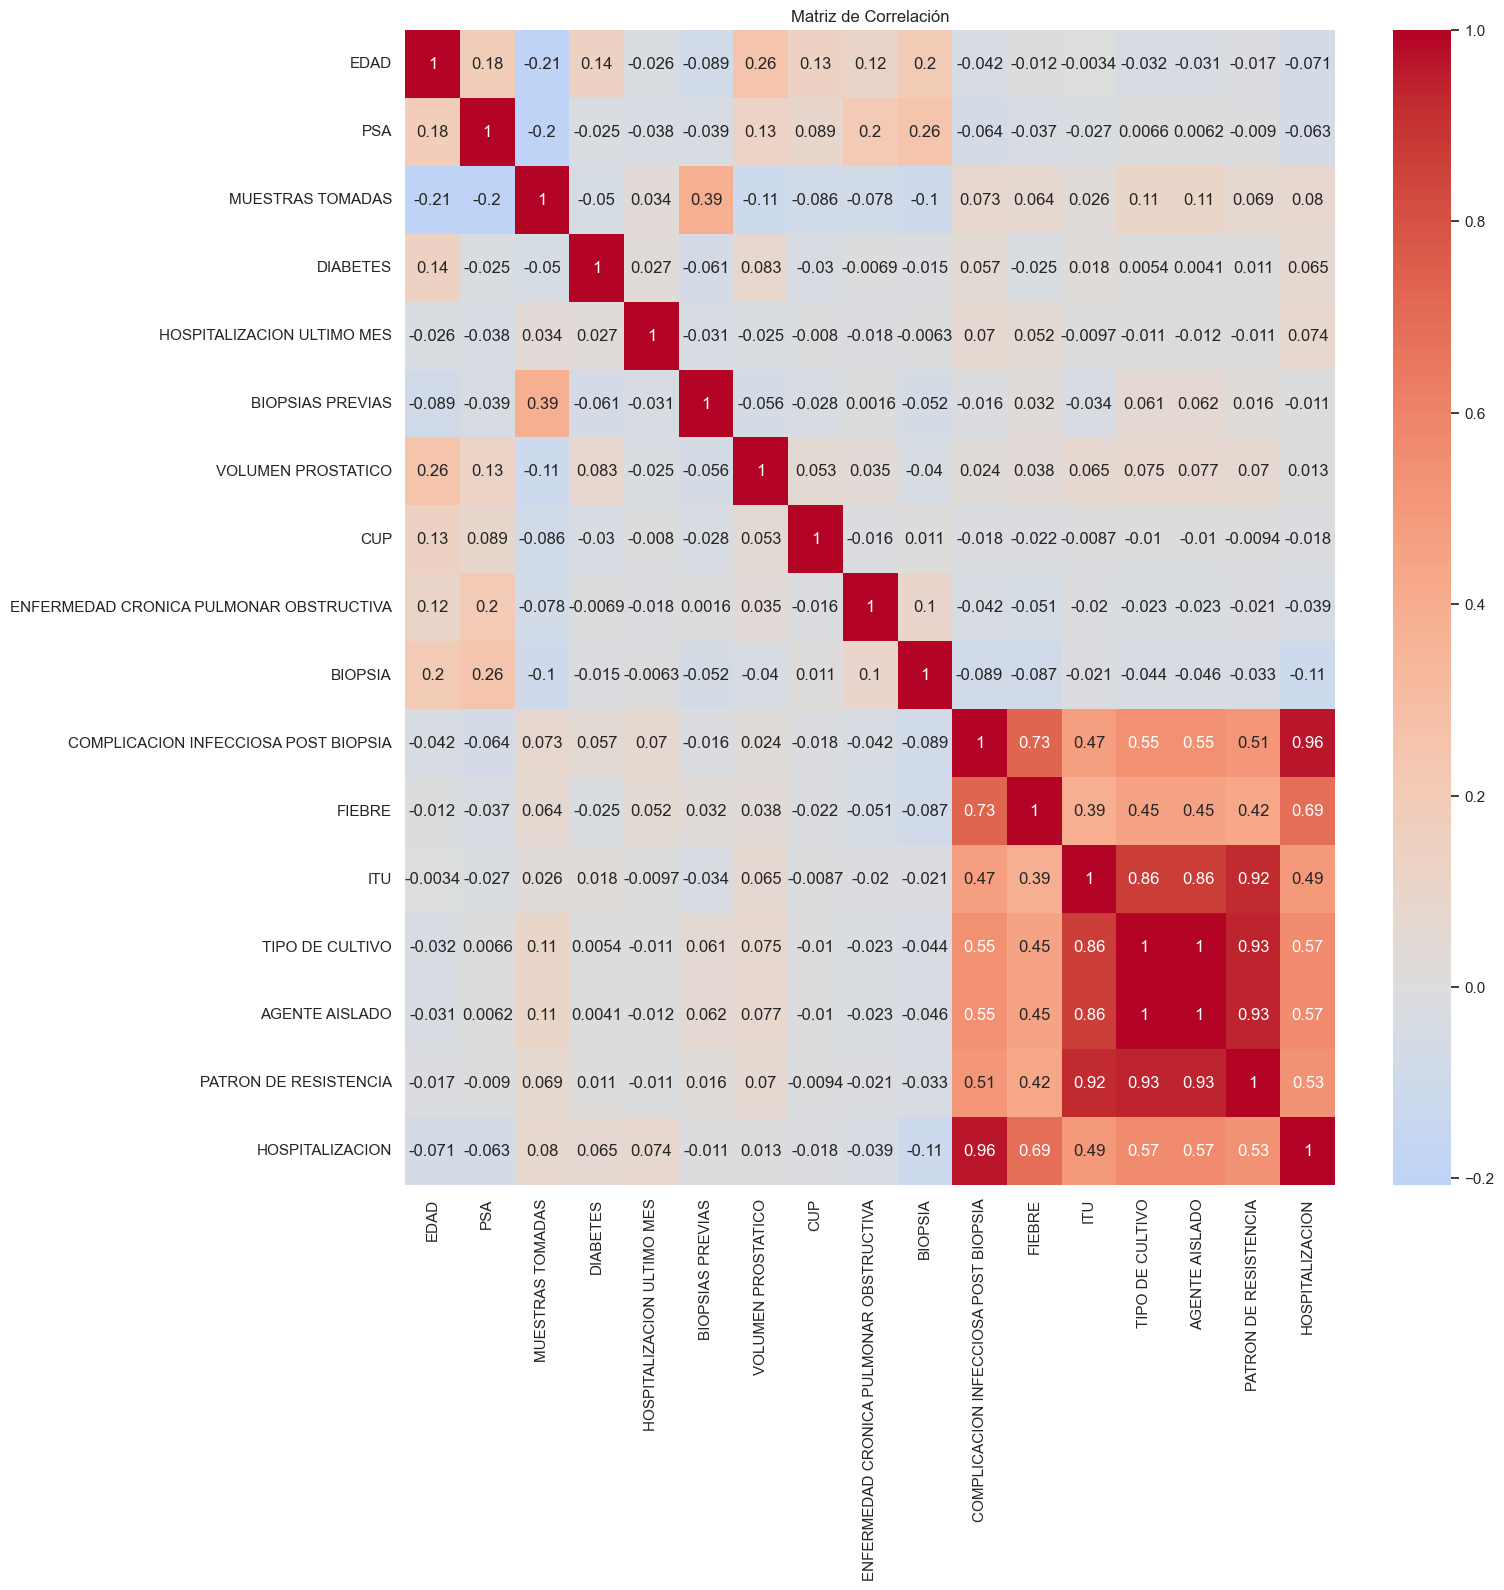

In [277]:
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_correlacion1, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Buscamos correlación entre las columnas categóricas (pasadas a binario) y numéricas del DF HospitalOk

In [273]:
columnas_binariasOk =  [ 'EDAD', 'PSA', 'MUESTRAS TOMADAS',
'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA', 'COMPLICACION INFECCIOSA POST BIOPSIA',
'FIEBRE', 'ITU', 'HOSPITALIZACION',
]

In [278]:
matriz_correlacion2 = HospitalOk[columnas_binariasOk].corr()

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(matriz_correlacion2, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

EXTRA. Por curiosidad, observamos cómo se comportan todas las variables múltiples en matriz de correlación,
utilizando TODAS las columnas categóricas del DF HospitalOk

In [260]:
a = ['EDAD', 'DIABETES', 'HOSPITALIZACION ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'MUESTRAS TOMADAS', 'CUP',
       'ENFERMEDAD CRONICA PULMONAR OBSTRUCTIVA',
       'COMPLICACION INFECCIOSA POST BIOPSIA', 'FIEBRE', 'ITU',
       'HOSPITALIZACION', 'BIOPSIA_ADENOCARCINOMA GLEASON 10',
       'BIOPSIA_ADENOCARCINOMA GLEASON 6', 'BIOPSIA_ADENOCARCINOMA GLEASON 7',
       'BIOPSIA_ADENOCARCINOMA GLEASON 8', 'BIOPSIA_ADENOCARCINOMA GLEASON 9',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
       'BIOPSIA_HIPERPLASIA PROSTATICA', 'BIOPSIA_NEG', 'BIOPSIA_PROSTATITIS',
       'TIPO_DE_CULTIVO_HEMOCULTIVO',
       'TIPO_DE_CULTIVO_HEMOCULTIVO Y UROCULTIVO', 'TIPO_DE_CULTIVO_NO',
       'TIPO_DE_CULTIVO_UROCULTIVO',
       'ANTIBIOTICO_UTILIZADO_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO_UTILIZADO_FLUOROQUINOLONA_AMINOGLUCOSIDO',
       'ANTIBIOTICO_UTILIZADO_OROQUINOLONAS', 'ANTIBIOTICO_UTILIZADO_OTROS',
       'AGENTE_AISLADO_E.COLI', 'AGENTE_AISLADO_NO',
       'AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA',
       'PATRON_DE_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
       'PATRON_DE_RESISTENCIA_MULTI SENSIBLE', 'PATRON_DE_RESISTENCIA_NO',
       'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
       'PATRON_DE_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA']

In [280]:
matriz_correlacion3 = HospitalOk[a].corr()

In [ ]:
plt.figure(figsize=(60, 60))
sns.heatmap(matriz_correlacion3, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')

Encontramos alta correlación (1.00) entre las variables AGENTE AISLADO y TIPO DE CULTIVO.

Encontramos alta correlación (0.96) entre las variables COMPLICACION INFECCIOSA(...) y HOSPITALIZACION.

Observamos que no hay variación por tipo de antibiótico utilizado, y todos los registros tienen un anitibiótico utilizado, por lo que la columna se puede eliminar sin problemas

Por el momento las guardamos. Las descartaremos posteriormente, en distintas pruebas del modelado, para comparar resultados.

# Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

Exportamos HospitalOk como HospitalOk_multi. Este DF guarda varias columnas de múltiple valor

In [282]:
# Exportamos el DataFrame a un archivo Excel
HospitalOk.to_excel(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\HospitalOk_multi.xlsx', index=False)

Exportamos HospitalModelado como HospitalModelado. Este DF registra en formato binario todas las categorías posibles

In [283]:
# Exportamos el DataFrame a un archivo Excel
HospitalModelado.to_excel(r'C:\Users\Usuario\proyectos PY\SOY HENRY\Bootcamp\M6\Proyecto Integrador\Propuesta 1\HospitalModelado.xlsx', index=False)